In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

5 5


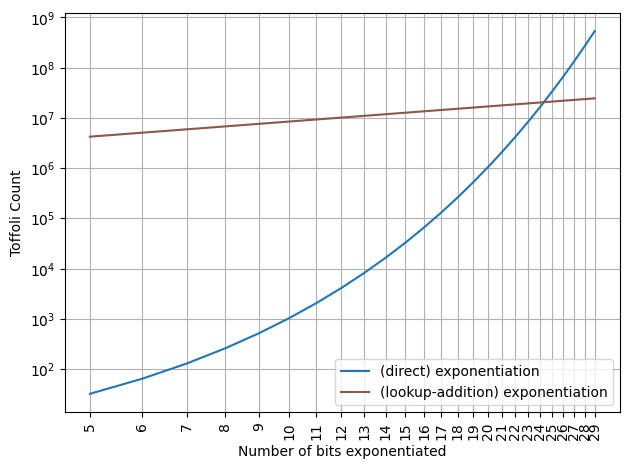

15833497.600000001


In [16]:
# w_e = 5, and xs is the number of bits. xs/w_e = number of windows
n = 2048
w_e = w_m = int(np.log2(n)/2)
print(w_e, w_m)
xs = np.arange(w_e,30)
only_lookup_cost = 2**xs
num_windows = xs/w_e
lookup_addition_costs = 2*num_windows * n*1./w_e * (2**(w_e+w_m) + 2*n + 2**((w_e+w_m)/2.))

plt.xscale('log')
plt.yscale('log')
plt.plot(xs, only_lookup_cost, color="C0", label="(direct) exponentiation")
plt.plot(xs, lookup_addition_costs, color="C5", label="(lookup-addition) exponentiation")
plt.xlabel("Number of bits exponentiated")
plt.xticks(xs, [str(e) for e in xs], rotation=90)
plt.ylabel("Toffoli Count")
plt.legend()
plt.grid(True)
plt.savefig("direct_exponentiation_vs_lookup_table_exponentiation.pdf")
plt.gcf().subplots_adjust(bottom=0.16)

plt.legend(loc='lower right', shadow=False)
plt.minorticks_off()
plt.tight_layout()  # truncate margins
plt.show()

print(max([y-x for (i ,(x, y)) in enumerate(zip(only_lookup_cost, lookup_addition_costs))]))

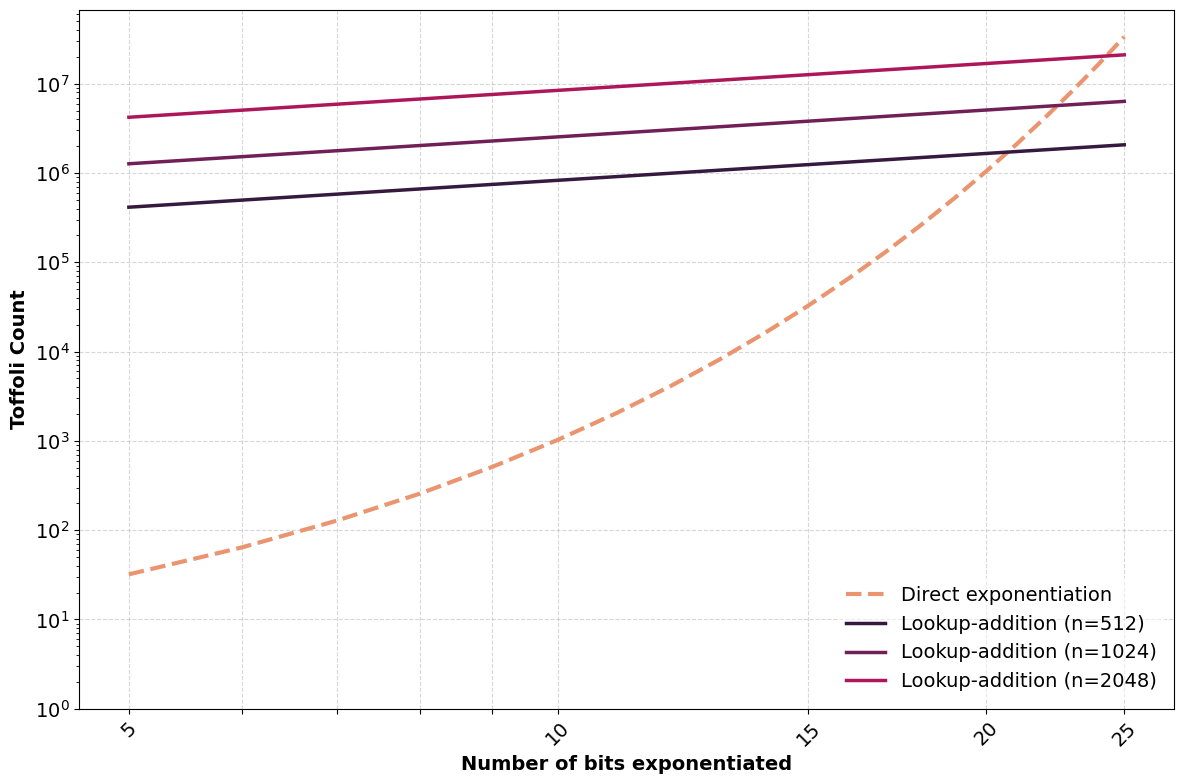

In [112]:
import matplotlib.ticker as ticker

def compare_exponentiation_costs(ns):
    # Create a figure with a larger size
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Use seaborn color palette
    colors = sns.color_palette("rocket", 2*len(ns))
    
    # Font sizes
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16
    
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=BIGGER_SIZE)
    plt.rc('axes', labelsize=MEDIUM_SIZE)
    plt.rc('xtick', labelsize=MEDIUM_SIZE)
    plt.rc('ytick', labelsize=MEDIUM_SIZE)
    plt.rc('legend', fontsize=MEDIUM_SIZE)
    
    # Direct exponentiation curve
    xs = np.arange(5, 26)
    only_lookup_cost = 2 ** xs
    ax.plot(xs, only_lookup_cost, color=sns.color_palette("flare", 8)[0], linestyle='--', 
             label="Direct exponentiation", linewidth=3)
    
    
    # Plot lookup-addition costs
    for idx, n in enumerate(ns):
        w_e = w_m = int(np.log2(n) / 2)
        num_windows = xs / w_e
        lookup_addition_costs = 2 * num_windows * n / w_e * (2**(w_e + w_m) + 2 * n + 2**((w_e + w_m) / 2.))
        
        ax.plot(xs, lookup_addition_costs, color=colors[idx], 
                 label=f"Lookup-addition (n={n})", linewidth=2.5)
        
        # Add crossover markers
        crossover_points = [(x, y) for x, y, d in zip(xs, lookup_addition_costs, only_lookup_cost) 
                            if abs(y - d) < d * 0.01]
        for x, y in crossover_points:
            ax.plot(x, y, 'D', color=colors[idx], 
                     markersize=10, markerfacecolor='white')

    # Axes scale and labels
    ax.set_xlabel("Number of bits exponentiated", fontweight='bold')
    ax.set_ylabel("Toffoli Count", fontweight='bold')
    
    # Set x-axis and y-axis to log scale
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Customize ticks
    ax.set_xticks([5, 6,7,8,9,10, 15, 20, 25])
    ax.set_xticklabels(['5', '', '', '', '', '10', '15', '20', '25'], rotation=45)
    
    # Explicitly set y-ticks to powers of 10
    y_ticks = [10**i for i in range(0, 8)]
    ax.set_yticks(y_ticks)
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, _: f'$10^{{{int(np.log10(y))}}}$'))

    # Grid and legend
    ax.grid(True, alpha=0.5, linestyle='--')
    ax.legend(loc='lower right', framealpha=0.5, edgecolor='white')
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot
    plt.savefig("./assets/direct_exponentiation_vs_lookup_table_exponentiation_combined.pdf",
                bbox_inches='tight', dpi=300)
    plt.show()

# Call the function

ns = [512, 1024, 2048]
compare_exponentiation_costs(ns)


## Estimate tof count of doing a direct lookpo and then teh rest being lookup additions for the first 20 bits

No handles with labels found to put in legend.


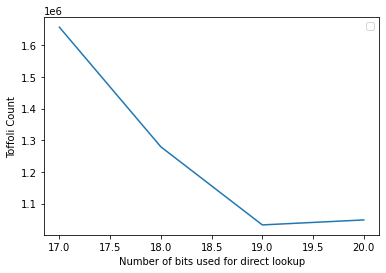

<Figure size 432x288 with 0 Axes>

In [15]:
exp_s = np.arange(17,21)
costs = []
for e in exp_s:
  costs.append(2**e + 2*(20-e)/5. * 2048/5. * (1024 + 2048 + 32))
  
plt.plot(exp_s, costs)
plt.xlabel("Number of bits used for direct lookup")
plt.ylabel("Toffoli Count")
plt.legend()
plt.show()
plt.savefig("compare_hybrid_lookup_additions_for_first_20_bits.pdf")

In [4]:
[(x, int(y)) for x,y in zip(only_lookup_cost, lookup_addition_costs)]

[(32, 4246732),
 (64, 5096079),
 (128, 5945425),
 (256, 6794772),
 (512, 7644119),
 (1024, 8493465),
 (2048, 9342812),
 (4096, 10192158),
 (8192, 11041505),
 (16384, 11890851),
 (32768, 12740198),
 (65536, 13589544),
 (131072, 14438891),
 (262144, 15288238),
 (524288, 16137584),
 (1048576, 16986931),
 (2097152, 17836277),
 (4194304, 18685624),
 (8388608, 19534970),
 (16777216, 20384317)]

In [5]:
numtofactor = 23*37
a = np.random.randint(2, numtofactor, 1)[0]
b = a**(numtofactor-1) % numtofactor
print(f"a:{a}, b mod N:{b}")

a:357, b mod N:475


In [11]:
xs = np.array([b**i % numtofactor for i in range(400)])

In [12]:
xs

array([  1, 475, 110, 339, 186, 697,  36,  80, 245, 432, 815, 480, 509,
        97, 777, 150, 741, 174, 389, 824, 737, 333, 752, 351, 313, 709,
       838,  64, 559, 297, 500, 742, 458, 481, 710, 734, 796, 399, 757,
       625, 302, 777, 274,  32,  25, 212, 768, 817, 388,  87, 186, 585,
       488, 147, 649, 460, 335, 268, 385, 751, 106, 374, 142,  84, 110,
        19, 162, 669, 813, 479, 835, 513, 233, 315, 522, 405, 832, 131,
       745, 162, 580, 818, 162, 580, 511, 754, 103, 499, 183, 358, 485,
       584, 806,  66, 612, 729,  63, 194, 263, 166,  23, 784,  86, 606,
        98, 173, 126, 714, 466, 298, 666, 309, 827, 782,  92, 639, 478,
       101, 136, 430, 631, 159, 849, 291,  60, 214, 443, 570, 396, 455,
       208, 493, 625, 777,  71, 818, 587, 535, 166, 255, 225, 373, 551,
       644,  20, 118, 295, 171,  81, 799, 707, 450,  37, 194, 555,  54,
       141, 786, 633,  75, 711, 800, 632,  81, 255, 231, 434, 590,  64,
       721, 599, 737, 837, 312, 306,  10, 180, 522, 261, 374, 65

In [13]:
np.where(xs == 1)[0]

array([0])

In [9]:
807**873 % numtofactor

591

In [10]:
g = 121
h = g
i = 0
print(int(np.ceil(np.log2(g))))
while h!=1:
  h = h//2 + h%2
  i+=1
print(i)

7
7
